# Analysis and Visualization of Complex Agro-Environmental Data
---
## Hypothesis testing

Most hypothesis testing functions in Python are provided by the stats submodule of SciPy. Other modules such as statsmodels and scikit have some advantages on the provided outputs and have additional relevant functions for hypothesis testing.

##### Import modules:

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'scipy.linalg._cythonized_array_utils'

##### Simulate populations (N = 100000)

In [9]:
# seed the random number generator
np.random.seed(24)
# generate univariate observations
pop1 = np.random.normal(50,20,100000)
pop2 = np.random.normal(70,25,100000)
pop3 = np.random.exponential(50, 100000)
pop4 = np.random.exponential(100, 100000)

### Parametric one-sample tests
#### One-sample t-test

1. Define H0 : The population mean is 40

2. Take a sample from population (pop1)

<AxesSubplot: ylabel='Count'>

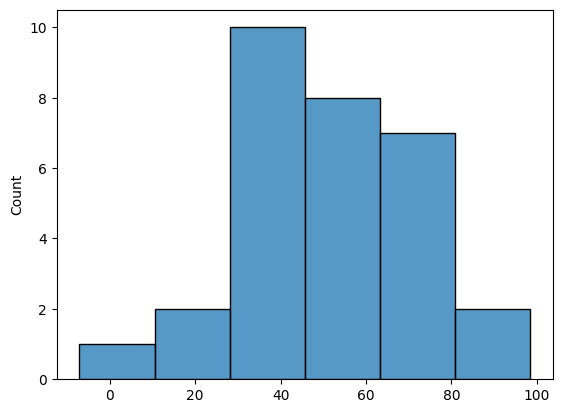

In [10]:
# Take random samples from data (n=30)
import random
sample1 = random.sample(list(pop1), 30)
sns.histplot(sample1)

3. Compute the statistic and check *p-value*

In [11]:
# perform one sample t-test. 
# H0: The population mean is 40
stat, p = sts.ttest_1samp(a=sample1, popmean=40)
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

AttributeError: Module 'scipy' has no attribute 'ttest_1samp'

### Parametric two-sample tests
#### Two-sample *t* test (two-tailed)

1. Define H0 : The samples are drawn from populations with equal means

2. Take sample from populations (pop1 and pop2)

In [ ]:
# Take random samples from data (n=20)
import random
random.seed(123)
sample1 = random.sample(list(pop1), 30)
sample2 = random.sample(list(pop2), 30)


3. Check assumptions: outliers, overal normality, homogeneity of variances

In [ ]:
# outliers
sns.stripplot(sample1)
sns.stripplot(sample2)

In [ ]:
# normality
sns.kdeplot(sample1)
sns.kdeplot(sample2)

In [ ]:
# Homogeneity of variances
# Leven's test - tests the null hypothesis that the population variances are equal
sts.levene(sample1, sample2, center='median')

LeveneResult(statistic=2.196275474289417, pvalue=0.14375771498051124)

4. Compute the statistic and check *p-value*

In [ ]:
stat, p = sts.ttest_ind(sample1, sample2, )
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

t-stat=-2.352, p-value=0.022


#### Two-sample *t* test (one-tailed)

H0 : Population 1 has a mean > or = to Population 2

In [ ]:
stat, p = sts.ttest_ind(sample1, sample2, alternative='greater')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

t-stat=-2.352, p-value=0.989


##### `Now try to run the last two tests analysis with the same code but now using  big data (the whole population or a big sample)`

#### Paired two-sample *t* test (two-tailed)

H0 : The samples are drawn from populations with equal means

In [ ]:
stat, p = sts.ttest_rel(sample1, sample2)
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

### Non-parametric two-sample tests
#### Kolmogorov-smirnov test

1. Define H0 : The two samples are drawn from populations with equal distributions
2. Take sample from populations pop1 and pop2 - use the same as previous example
3. Check assumptions (see test for homeogeneity of variances above)
3. Compute the statistic and check *p-value*

In [ ]:
stat, p = sts.ks_2samp(sample1, sample2)
print('stat=%.3f, p-value=%.3f' % (stat, p))

#### Mann-Whitney U Test (or Wilcoxon rank sum test) - two-tailed test

H0 : The two samples are drawn from populations with equal medians

In [ ]:
stat, p = sts.mannwhitneyu(sample1, sample2, alternative='two-sided')
print('stat=%.3f, p-value=%.3f' % (stat, p))

#### Mann-Whitney U Test (or Wilcoxon rank sum test) - one-tailed test

H0 : Population 1 has a median > or = to Population 2

In [ ]:
stat, p = sts.mannwhitneyu(sample1, sample2, alternative='greater')
print('stat=%.3f, p-value=%.3f' % (stat, p))

#### Wilcoxon signed rank test (paired)

H0 : The two samples are drawn from populations with equal medians

In [ ]:
stat, p = sts.wilcoxon(sample1, sample2)
print('stat=%.3f, p-value=%.3f' % (stat, p))

### Parametric multiple sample tests
#### One-way ANOVA
1. Define H0 : The samples are drawn from populations with equal means
2. Take sample from populations pop1 - pop4

In [ ]:
# Take random samples from data (n=20)
import random
sample1 = random.sample(list(pop1), 50)
sample2 = random.sample(list(pop2), 50)
sample3 = random.sample(list(pop3), 50)
sample4 = random.sample(list(pop4), 50)
sns.kdeplot(sample1, label='Pop1')
sns.kdeplot(sample2, label='Pop2')
sns.kdeplot(sample3, label='Pop3')
sns.kdeplot(sample4, label='Pop4')
plt.legend(frameon=False, loc='upper right')

3. Compute the statistic and check the *p-value*

In [ ]:
stat, p = sts.f_oneway(sample1, sample2, sample3, sample4)
print('F-statistics=%.3f, p=%.6f' % (stat, p))

The SciPy does not provide the usual ANOVA table. An alternative is to use the statsmodel api that includes a more complete output:

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# the statsmodels ANOVA needs to convert data into a DataFrame
list_sample = [sample1, sample2, sample2, sample4]
df = pd.DataFrame(list_sample)
df = df.T
df.columns = ["sample1", "sample2", "sample3", "sample4"]
df = df.stack()
df=df.reset_index()
df.rename(columns = {'level_1':'group', 0:'value'}, inplace = True)
df.drop('level_0', inplace=True, axis=1)
df

In [ ]:
mod = ols('value ~ group',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2) # typ is the type of anova to perform ('I','II' or 'III' = 1,2,3) - type 2 does not consider interactions, which is the case.
print(aov_table) # provides the usual ANOVA table

#### Two-way ANOVA

Tests whether two factors affect the mean of three or more groups. It also tests whether there is an interaction between the two factors (if one factor changes the effect of the other factor).

Possible H0: 
1. There is no difference in the means of factor A.
2. There is no difference in means of factor B.
3. There is no interaction between factors A and B.

In [ ]:
# create data (example taken from https://www.statology.org/two-way-anova-python/) - influence of plant growth by sunlight exposure and watering frequency
df2 = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
print(df2)

In [ ]:
#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


#### Repeated measures ANOVA

Used when the responses from the same subjects (experimental units) are measured repeatedly over a period of time or under different experimental conditions.

H0: Treatment or time groups means are equal

In [ ]:
#create data - Ex: Measurements (time of response to stressor) taken over time for the same fish individuals
df3 = pd.DataFrame({'fish': np.repeat([1, 2, 3, 4, 5], 4),
                   'time': np.tile([1, 2, 3, 4], 5),
                   'time of response': [30, 28, 16, 34,
                                14, 18, 10, 22,
                                24, 20, 18, 30,
                                38, 34, 20, 44, 
                                26, 28, 14, 30]})
df3

In [ ]:
rmanova = stm.anova.AnovaRM(data=df3, depvar='time of response', subject='fish', within=['time']).fit()
print(rmanova)

### Post-hoc or multiple comparison tests

#### Tukey's test

To check which pairs of groups differ in their mean values. Can be used also as a stand alone test.
Implemented in statsmodels.stats.multicomp

In [ ]:
# perform Tukey's test using the df dataframe defined above)
tukey = stm.multicomp.pairwise_tukeyhsd(endog=df['value'],
                          groups=df['group'],
                          alpha=0.05)
#display results
print(tukey)

### Non-parametric multiple sample tests
#### Kruskal-Wallis test
1. Define H0 : The samples are drawn from populations with equal medians
2. Take sample from populations (pop1 and pop2) - use the same as previous examples
3. Compute the statistic and check the *p-value*

In [ ]:
stat, p = sts.kruskal(sample1, sample2, sample3, sample4)
print('F-statistics=%.3f, p=%.6f' % (stat, p))

#### Dunn's test (multiple comparisons)

The Dunn's test is a non-parametric multiple comparison test to check which pairs of groups differ when a Kruskal-wallis test (or Friedman test) rejects the null hypothesis. It is implemented in the scikit-posthocs module (you may need to install: run `pip install scikit-posthocs` in the CLI terminal).

H0 : The samples are drawn from populations with equal medians

In [ ]:
# need to a list with samples (can be the list_sample produced above)
sp.posthoc_dunn(list_sample, p_adjust = 'bonferroni') # the correction for multiple comparisons is based on the bonferroni's correction.
# the output is a matrix of p-values for each pair of groups.

#### Friedman test

This is the non-parametric equivalent of a repeated measures ANOVA. It is implemented in statsmodels. 

H0 : The samples are drawn from populations with equal medians

In [ ]:
# use same data as for the repeated measures ANOVA
stat, p = sts.friedmanchisquare(df3['time of response'][0:4], 
                                df3['time of response'][5:9], 
                                df3['time of response'][10:14], 
                                df3['time of response'][15:19])
print('Statistic=%.3f, p=%.6f' % (stat, p))

### Tests for categorical variables

#### Chi-Square Test of Independence

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables.

H0: The two variables are independent.

In [ ]:
# Create data contingency table (counts for each class combination of two categorical variables, for ex. treatment in columns (3 treatments) vs. success of treatment (yes/no) in rows)
data = [[120, 90, 40],
        [110, 95, 45]]

# run test
sts.chi2_contingency(data)